# **Predicting Glaucoma Risk Using Machine Learning: A Comprehensive Analysis**

Using the dataset given in this link [Human Glaucoma](https://www.kaggle.com/datasets/gchan357/human-glaucoma), I employed various machine learning techniques such as Random Forest and Gradient Boosting to predict the risk of glaucoma, addressing class imbalance through SMOTE to enhance model performance and accuracy in identifying high-risk patients


**Summary of Steps Taken**


1.   Data Preparation:

*   The dataset was loaded, and relevant features were selected for modeling. The risk_factor column was dropped to assess its impact on model performance.
*   The data was split into training and testing sets to enable model training and evaluation.


2.   Model Training and Evaluation:



*   Random Forest Classifier: This model was first trained on the original dataset to establish a baseline performance. It was evaluated using accuracy metrics and a classification report.
*   Feature Importance Analysis: The importance of each feature was analyzed to understand their contributions to the model's predictions. A bar plot visualized the feature importances.


3. Hyperparameter Tuning:

* Grid Search was employed to tune the hyperparameters of the Random Forest model. This involved testing various combinations of parameters (like n_estimators, max_depth, etc.) to identify the optimal settings that improve model performance.


4. Model Selection:

* After identifying the best parameters, the model was retrained with the selected features and evaluated again using accuracy and cross-validation scores.


5. Handling Class Imbalance:

* **SMOTE (Synthetic Minority Over-sampling Technique)**: This technique was applied to address class imbalance in the dataset. It generated synthetic samples for the minority class to improve model training.
* The model's performance after applying SMOTE was evaluated, comparing accuracy and classification metrics with the baseline model.


6. Alternative Model Testing:

* A Gradient Boosting Classifier was also trained on the dataset. This model was evaluated similarly to the Random Forest model to compare their performances in predicting glaucoma.


7. Performance Metrics:

* Throughout the process, metrics such as accuracy, classification reports, ROC AUC scores, and confusion matrices were used to evaluate model performance and provide insights into the predictions made by the models.

# **Rationale for Methods Used**

* **Random Forest**: A robust ensemble method that handles large datasets with high dimensionality well. It is effective for both classification and regression tasks, providing insights through feature importance.

* **Hyperparameter** Tuning: Necessary to optimize model performance, as default settings may not yield the best results. Grid Search automates this process by testing various parameter combinations.

* **SMOTE**: Essential for improving model performance in cases of class imbalance, ensuring the model learns effectively from underrepresented classes.

* **Gradient Boosting**: Another powerful ensemble technique that can lead to better performance through boosting, where weak learners are combined to form a strong learner. Testing multiple models allows for a comprehensive understanding of which algorithm works best for the specific dataset.

* **Cross-Validation**: Utilized to provide a more reliable estimate of model performance, reducing the risk of overfitting by validating the model on unseen data.

Overall, these methods were chosen to build a robust model capable of accurately predicting glaucoma risk based on available features, while also ensuring that the insights gained from the analysis could inform future clinical decisions. If you need more details on specific parts or additional assistance, feel free to ask!

#  Install Required Packages

In [99]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


# Load and Preview Dataset

In [101]:
import pandas as pd

# Load Excel file
file_path = "Glucoma_dataset\ds_whole.csv" # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


   RL  glaucoma  age  ocular_pressure    MD   PSD  GHT  cornea_thickness  \
0  OD         0   62               17 -0.54  1.81    0               558   
1  OS         0   62               17 -0.64  1.38    0               564   
2  OD         0   66               12 -1.65  2.89    2               490   
3  OS         0   66               12 -1.14  3.88    2               495   
4  OD         1   53               24 -2.90  3.78    2               547   

   RNFL4.mean  
0  103.333333  
1  107.666667  
2  162.000000  
3   99.000000  
4   74.666667  


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\syb26\AppData\Local\Temp\ipykernel_18668\2987794253.py:4: SyntaxWarning: invalid escape sequence '\d'
  file_path = "Glucoma_dataset\ds_whole.csv" # Replace with your actual file path


# 📊 Data Overview and Summary Statistics

In [103]:
# Check data types and non-null counts
print(data.info())

# Get summary statistics for numeric columns
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RL                499 non-null    object 
 1   glaucoma          499 non-null    int64  
 2   age               499 non-null    int64  
 3   ocular_pressure   499 non-null    int64  
 4   MD                499 non-null    float64
 5   PSD               499 non-null    float64
 6   GHT               499 non-null    int64  
 7   cornea_thickness  499 non-null    int64  
 8   RNFL4.mean        499 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 35.2+ KB
None
         glaucoma         age  ocular_pressure          MD         PSD  \
count  499.000000  499.000000       499.000000  499.000000  499.000000   
mean     0.595190   56.845691        20.963928   -8.661383    5.512084   
std      0.491348   15.408306         8.546982   10.296883    4.262622   
min      0.0000

# 🔍 Missing Values Check

In [105]:
# Check for any missing values in each column
print(data.isnull().sum())

RL                  0
glaucoma            0
age                 0
ocular_pressure     0
MD                  0
PSD                 0
GHT                 0
cornea_thickness    0
RNFL4.mean          0
dtype: int64


# 🚫 Remove Missing Values

In [107]:
data = data.dropna()

# 🔧 Fill Missing Values in Specific Columns with Mean

In [109]:
data['ocular_pressure'].fillna(data['ocular_pressure'].mean(), inplace=True)
data['cornea_thickness'].fillna(data['cornea_thickness'].mean(), inplace=True)

C:\Users\syb26\AppData\Local\Temp\ipykernel_18668\4223808959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ocular_pressure'].fillna(data['ocular_pressure'].mean(), inplace=True)
C:\Users\syb26\AppData\Local\Temp\ipykernel_18668\4223808959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [110]:
data['ocular_pressure'] = data['ocular_pressure'].fillna(data['ocular_pressure'].mean())
data['cornea_thickness'] = data['cornea_thickness'].fillna(data['cornea_thickness'].mean())

# 🔧 Fill Missing Values in 'ocular_pressure' with Median

In [112]:
data['ocular_pressure'].fillna(data['ocular_pressure'].median(), inplace=True)

C:\Users\syb26\AppData\Local\Temp\ipykernel_18668\4283571438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ocular_pressure'].fillna(data['ocular_pressure'].median(), inplace=True)


In [113]:
data['ocular_pressure'].fillna(data['ocular_pressure'].median())

0      17
1      17
2      12
3      12
4      24
       ..
494    15
495    15
496    16
497    18
498    18
Name: ocular_pressure, Length: 499, dtype: int64

# 🔍 Display Unique Values in 'RL' Column

In [115]:
print(data['RL'].unique())

['OD' 'OS']




# 🔄 Map 'RL' Values to Numeric: 'OD' to 1 and 'OS' to 0

In [117]:
data['RL'] = data['RL'].map({'OD': 1, 'OS': 0})

# Display the first few rows of the cleaned DataFrame

In [119]:
print(data.head())

   RL  glaucoma  age  ocular_pressure    MD   PSD  GHT  cornea_thickness  \
0   1         0   62               17 -0.54  1.81    0               558   
1   0         0   62               17 -0.64  1.38    0               564   
2   1         0   66               12 -1.65  2.89    2               490   
3   0         0   66               12 -1.14  3.88    2               495   
4   1         1   53               24 -2.90  3.78    2               547   

   RNFL4.mean  
0  103.333333  
1  107.666667  
2  162.000000  
3   99.000000  
4   74.666667  


# Data Loading, Preprocessing, and Standardization for Glaucoma Risk Prediction

In [121]:
from sklearn.preprocessing import StandardScaler

# Select columns to standardize
columns_to_standardize = ['ocular_pressure', 'cornea_thickness', 'RNFL4.mean', 'MD', 'PSD']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to selected columns
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# Check the standardized values
print(data.head())

   RL  glaucoma  age  ocular_pressure        MD       PSD  GHT  \
0   1         0   62        -0.464246  0.789514 -0.869371    0   
1   0         0   62        -0.464246  0.779793 -0.970349    0   
2   1         0   66        -1.049835  0.681606 -0.615751    2   
3   0         0   66        -1.049835  0.731185 -0.383267    2   
4   1         1   53         0.355578  0.560088 -0.406750    2   

   cornea_thickness  RNFL4.mean  
0          0.527140    0.806925  
1          0.705919    0.975183  
2         -1.499017    3.084885  
3         -1.350035    0.638666  
4          0.199379   -0.306170  


# Risk Factor Indicator and Age Grouping for Glaucoma Dataset

In [123]:
# Risk Factor Indicator
data['risk_factor'] = data['glaucoma'].apply(lambda x: 1 if x > 0 else 0)

# Age Grouping
data['age_group'] = pd.cut(data['age'], bins=[0, 40, 60, 100], labels=['under_40', '40-60', 'over_60'])

# Splitting Data into Training and Testing Sets

In [125]:
from sklearn.model_selection import train_test_split

# Define target variable and features
X = data.drop(columns=['glaucoma'])
y = data['glaucoma']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check Data Types of Each Column

In [127]:
print(data.dtypes)

RL                     int64
glaucoma               int64
age                    int64
ocular_pressure      float64
MD                   float64
PSD                  float64
GHT                    int64
cornea_thickness     float64
RNFL4.mean           float64
risk_factor            int64
age_group           category
dtype: object


# One-Hot Encoding for Age Groups

In [129]:
data = pd.get_dummies(data, columns=['age_group'], prefix='age_group')

# Display Data Types of Each Column

In [131]:
print(data.dtypes)

RL                      int64
glaucoma                int64
age                     int64
ocular_pressure       float64
MD                    float64
PSD                   float64
GHT                     int64
cornea_thickness      float64
RNFL4.mean            float64
risk_factor             int64
age_group_under_40       bool
age_group_40-60          bool
age_group_over_60        bool
dtype: object


# Define Feature Columns for Model Training

In [133]:
# Define feature columns including the new age group columns
feature_columns = [
    'RL', 'ocular_pressure', 'MD', 'PSD', 'GHT', 'cornea_thickness',
    'RNFL4.mean', 'risk_factor', 'age_group_under_40',
    'age_group_40-60', 'age_group_over_60'
]

X = data[feature_columns]
y = data['glaucoma']  # Assuming 'glaucoma' is the target variable

# Split Data into Training and Testing Sets

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest Model without 'risk_factor' and Evaluate Performance

In [137]:
# Drop the 'risk_factor' column
X_no_risk = X.drop(columns=['risk_factor'])

# Split the data again
from sklearn.model_selection import train_test_split

X_train_no_risk, X_test_no_risk, y_train, y_test = train_test_split(X_no_risk, y, test_size=0.2, random_state=42)

# Train a new RandomForest model
from sklearn.ensemble import RandomForestClassifier

rf_model_no_risk = RandomForestClassifier(random_state=42)
rf_model_no_risk.fit(X_train_no_risk, y_train)

# Predict and evaluate the model without 'risk_factor'
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score  # Correct import

y_pred_no_risk = rf_model_no_risk.predict(X_test_no_risk)
print("Model Accuracy without 'risk_factor':", accuracy_score(y_test, y_pred_no_risk))
print("\nClassification Report without 'risk_factor':\n", classification_report(y_test, y_pred_no_risk))

# Cross-validation
cross_val_scores_no_risk = cross_val_score(rf_model_no_risk, X_no_risk, y, cv=5)
print("Cross-validation scores without 'risk_factor':", cross_val_scores_no_risk)
print("Mean cross-validation score without 'risk_factor':", cross_val_scores_no_risk.mean())

Model Accuracy without 'risk_factor': 0.93

Classification Report without 'risk_factor':
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        48
           1       0.94      0.92      0.93        52

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

Cross-validation scores without 'risk_factor': [0.88      0.85      0.93      0.97      0.8989899]
Mean cross-validation score without 'risk_factor': 0.9057979797979797


# Visualize Confusion Matrix for Model Performance Evaluation

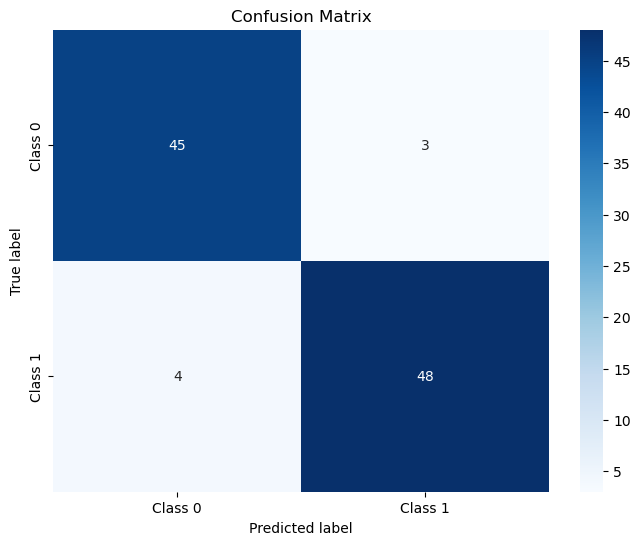

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Your existing code for the confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_no_risk)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Train Random Forest Model without 'risk_factor' and Evaluate Cross-Validation Scores


In [141]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop the 'risk_factor' column if you haven't done this already
X_no_risk = X.drop(columns=['risk_factor'])

# Split the data
X_train_no_risk, X_test_no_risk, y_train, y_test = train_test_split(X_no_risk, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model_no_risk = RandomForestClassifier(random_state=42)
rf_model_no_risk.fit(X_train_no_risk, y_train)

# Perform 5-fold cross-validation
cv_scores_no_risk = cross_val_score(rf_model_no_risk, X_no_risk, y, cv=5)
print("Cross-validation scores without 'risk_factor':", cv_scores_no_risk)
print("Mean cross-validation score without 'risk_factor':", cv_scores_no_risk.mean())

Cross-validation scores without 'risk_factor': [0.88      0.85      0.93      0.97      0.8989899]
Mean cross-validation score without 'risk_factor': 0.9057979797979797


# Train Random Forest Model without 'risk_factor' and Evaluate Predictions

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Drop the 'risk_factor' column
X_no_risk = X.drop(columns=['risk_factor'])

# Split the data
X_train_no_risk, X_test_no_risk, y_train, y_test = train_test_split(X_no_risk, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model_no_risk = RandomForestClassifier(random_state=42)
rf_model_no_risk.fit(X_train_no_risk, y_train)

# Make predictions on the test set
y_pred_no_risk = rf_model_no_risk.predict(X_test_no_risk)

# Print the classification report
print(classification_report(y_test, y_pred_no_risk))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        48
           1       0.94      0.92      0.93        52

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



# Visualize Feature Importances from Random Forest Model (without 'risk_factor')


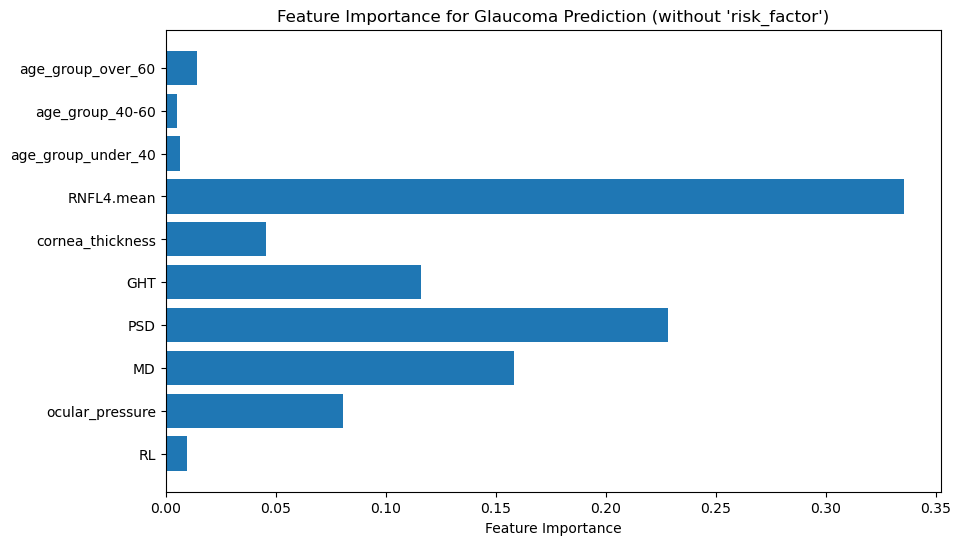

In [145]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Drop the 'risk_factor' column
X_no_risk = X.drop(columns=['risk_factor'])

# Split the data
X_train_no_risk, X_test_no_risk, y_train, y_test = train_test_split(X_no_risk, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model_no_risk = RandomForestClassifier(random_state=42)
rf_model_no_risk.fit(X_train_no_risk, y_train)

# Get feature importances
importances = rf_model_no_risk.feature_importances_
feature_names = X_no_risk.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Glaucoma Prediction (without 'risk_factor')")
plt.show()

# Plot Feature Importance for Glaucoma Prediction (without 'risk_factor')


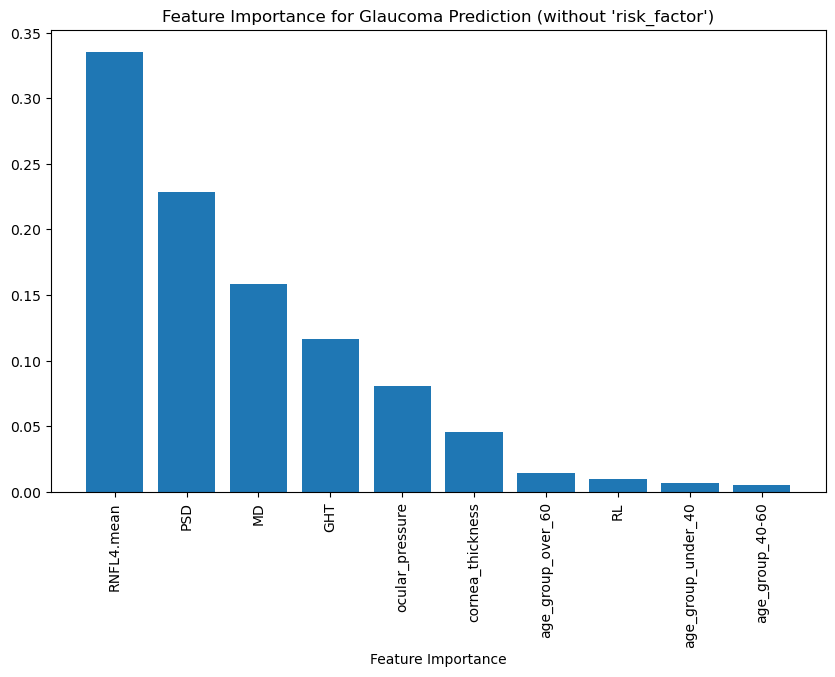

In [147]:
# Plot feature importance without 'risk_factor'
import matplotlib.pyplot as plt
import numpy as np

feature_importances = rf_model_no_risk.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Glaucoma Prediction (without 'risk_factor')")
plt.bar(range(X_no_risk.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_no_risk.shape[1]), X_no_risk.columns[indices], rotation=90)
plt.xlabel("Feature Importance")
plt.show()

# Confusion Matrix Visualization for Glaucoma Prediction (without 'risk_factor')


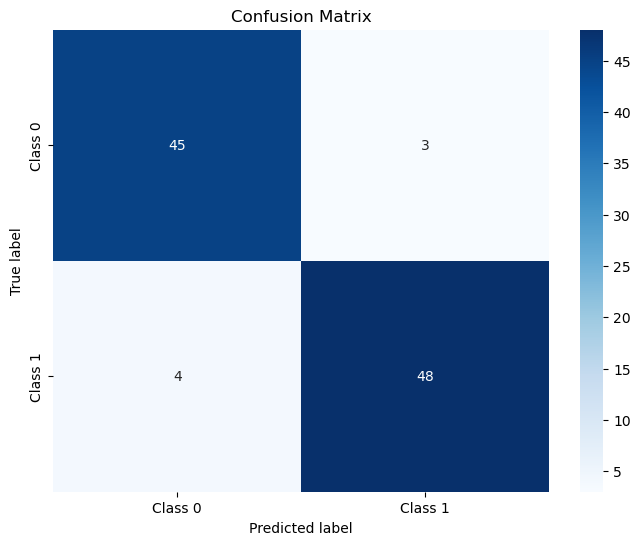

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_no_risk)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Visualization for Glaucoma Prediction (without 'risk_factor')


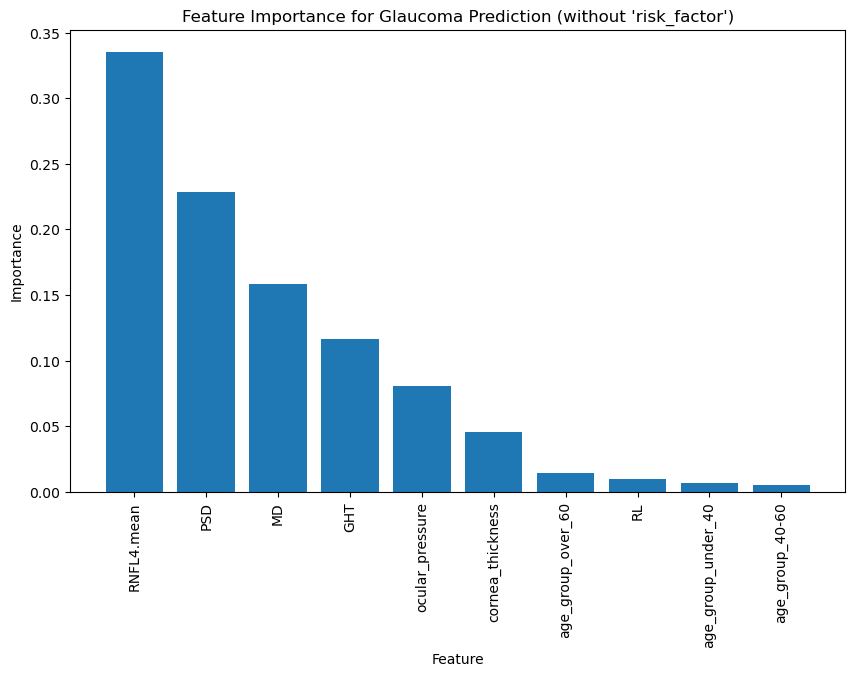

In [151]:
import numpy as np  # Import NumPy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Drop the 'risk_factor' column
X_no_risk = X.drop(columns=['risk_factor'])

# Split the data
X_train_no_risk, X_test_no_risk, y_train, y_test = train_test_split(X_no_risk, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model_no_risk = RandomForestClassifier(random_state=42)
rf_model_no_risk.fit(X_train_no_risk, y_train)

# Get feature importances
importances = rf_model_no_risk.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Glaucoma Prediction (without 'risk_factor')")
plt.bar(range(X_no_risk.shape[1]), importances[indices], align="center")
plt.xticks(range(X_no_risk.shape[1]), X_no_risk.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Hyperparameter Tuning for Random Forest Model Using Grid Search

In [153]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model_no_risk, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_no_risk, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


# Evaluate the Tuned Random Forest Model with Cross-Validation

In [155]:
cross_val_scores_no_risk = cross_val_score(grid_search.best_estimator_, X_no_risk, y, cv=5)
print("Mean cross-validation score after tuning:", cross_val_scores_no_risk.mean())

Mean cross-validation score after tuning: 0.9077777777777776


# Train and Evaluate Random Forest Model with Best Parameters


In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your feature set (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with the best parameters
rf_model_best = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=50, random_state=42)

# Fit the model
rf_model_best.fit(X_train, y_train)

# Predictions
y_pred_best = rf_model_best.predict(X_test)

# Evaluation
print("Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Cross-validation
cv_scores_best = cross_val_score(rf_model_best, X, y, cv=5)
print("Cross-validation scores:", cv_scores_best)
print("Mean cross-validation score:", cv_scores_best.mean())

Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


# Cross-Validation for Random Forest Model without 'risk_factor'

In [159]:
# Assuming your original target variable is `y` and you want to keep it as it is
# If you haven't defined y_no_risk yet, just use y
y_no_risk = y  # Keep the original target variable, or redefine if needed

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model_no_risk, X_no_risk, y_no_risk, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.88      0.85      0.93      0.97      0.8989899]
Mean cross-validation score: 0.9057979797979797


# Tuning and Evaluating Random Forest Model


In [161]:
from sklearn.ensemble import RandomForestClassifier

# Tune your Random Forest parameters
rf_model_tuned = RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=100, random_state=42)
rf_model_tuned.fit(X_train_no_risk, y_train)

# Evaluate the tuned model
y_pred_tuned = rf_model_tuned.predict(X_test_no_risk)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))


Tuned Model Accuracy: 0.91


# Plotting Feature Importance for Tuned Random Forest Model


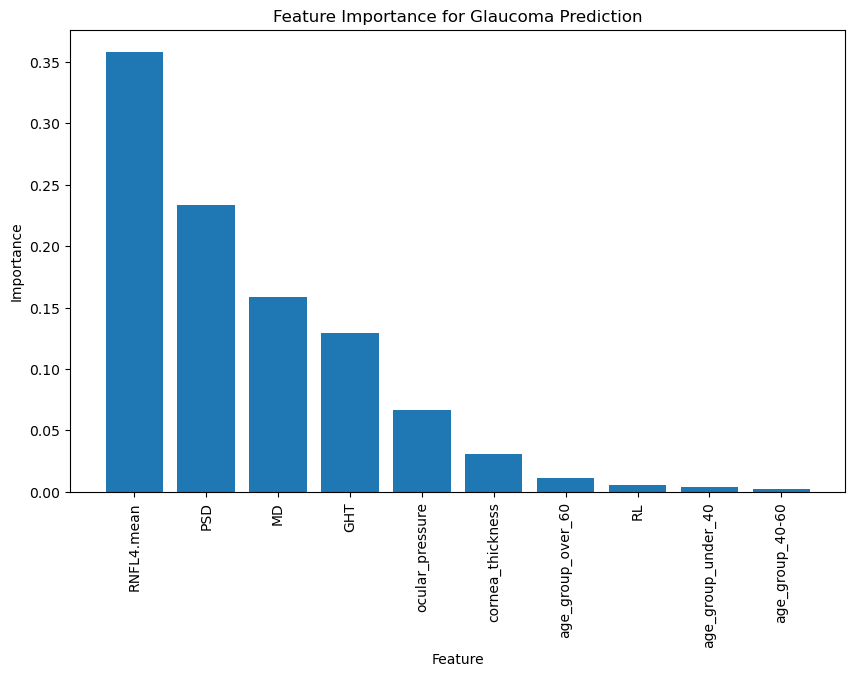

In [163]:
importances = rf_model_tuned.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Glaucoma Prediction")
plt.bar(range(X_no_risk.shape[1]), importances[indices], align="center")
plt.xticks(range(X_no_risk.shape[1]), X_no_risk.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Visualizing the Confusion Matrix for Tuned Random Forest Model

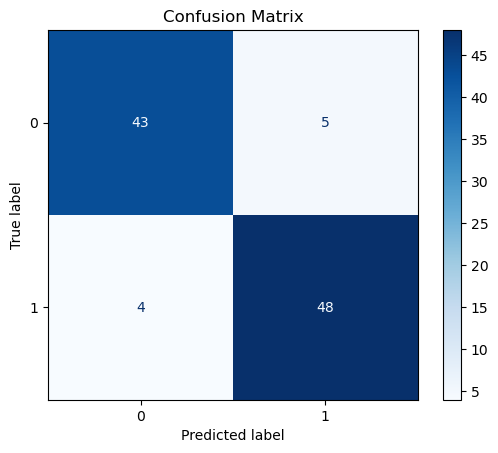

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Hyperparameter Tuning for Random Forest using GridSearchCV

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Set the parameters you want to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_no_risk, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


# Training the Random Forest Model with Best Parameters and Feature Selection

In [169]:
# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_no_risk, y_train)

# Get feature importances
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top N features based on importance (e.g., top 5)
top_n = 5
top_features = X_no_risk.columns[indices][:top_n]
X_selected = X_no_risk[top_features]

# Re-split the data with selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Training and Evaluating the Random Forest Model with Selected Features


In [171]:
# Fit the model with selected features
best_rf_model.fit(X_train_selected, y_train_selected)

# Predict and evaluate
y_pred_selected = best_rf_model.predict(X_test_selected)

from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
print("Model Accuracy with Selected Features:", accuracy_score(y_test_selected, y_pred_selected))
print("\nClassification Report:\n", classification_report(y_test_selected, y_pred_selected))

Model Accuracy with Selected Features: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        48
           1       0.94      0.92      0.93        52

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



# Cross-Validation of the Random Forest Model with Selected Features


In [173]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X_selected, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.91       0.85       0.96       0.96       0.85858586]
Mean cross-validation score: 0.9077171717171716


# Plotting Feature Importance of the Tuned Random Forest Model with Selected Features


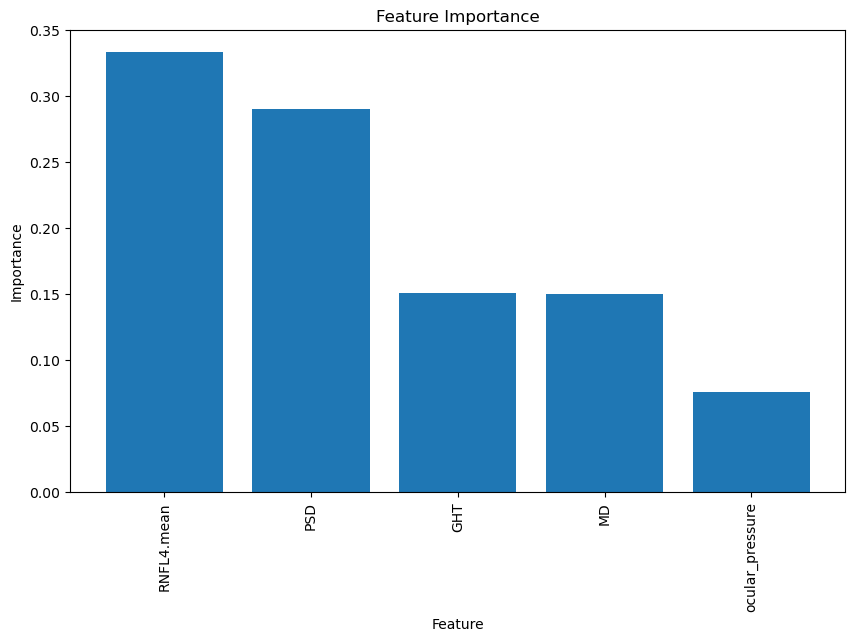

In [175]:
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_selected.shape[1]), importances[indices], align="center")
plt.xticks(range(X_selected.shape[1]), X_selected.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Calculate and Print the ROC AUC Score for the Tuned Random Forest Model


In [177]:
from sklearn.metrics import roc_auc_score

y_pred_proba = best_rf_model.predict_proba(X_test_selected)[:, 1]
roc_auc = roc_auc_score(y_test_selected, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.953125


# Plot the ROC Curve for the Tuned Random Forest Model

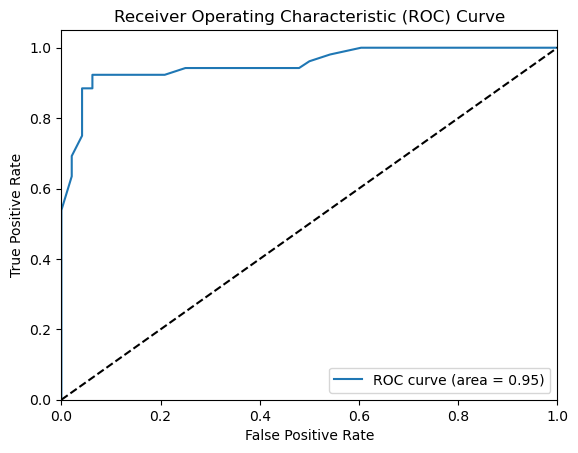

In [179]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_selected, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Install the imbalanced-learn library

In [181]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# Import the SMOTE class for oversampling the minority class

In [183]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data by generating synthetic samples for the minority class

In [185]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train_no_risk, y_train)

# Train and predict Random Forest model on resampled data using SMOTE and evaluate its performance on the original test set

In [187]:
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred_smote = rf_model_smote.predict(X_test_no_risk)
print("Model Accuracy after SMOTE:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report after SMOTE:\n", classification_report(y_test, y_pred_smote))

Model Accuracy after SMOTE: 0.94

Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.96      0.92      0.94        52

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



# Import Gradient Boosting Classifier from scikit-learn for model training and prediction

In [189]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train a Gradient Boosting Classifier, then predict and evaluate model performance

In [191]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_no_risk, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test_no_risk)
print("Model Accuracy using Gradient Boosting:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report using Gradient Boosting:\n", classification_report(y_test, y_pred_gb))

Model Accuracy using Gradient Boosting: 0.94

Classification Report using Gradient Boosting:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.96      0.92      0.94        52

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [250]:
import pickle
pickle.dump(rf_model_no_risk, open('rf_model_no_risk.pkl', 'wb'))